In [1]:
!pip install torch torchvision -q
!pip install gdown
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.

##**Install dan Import Library**

In [2]:
import numpy as np
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, callbacks
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
torch.manual_seed(42)

# Configure matplotlib
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

##**Data Loading dan Initial Exploration**

In [5]:
file_id = "1Sp_bKgIUm6LoR6G4LeJs1FBnDfZVkPgq"
url = f"https://drive.google.com/uc?export=download&id={file_id}"

# Download to local path
output = "RegresiUTSTelkom.csv"
gdown.download(url, output, quiet=False)

# Then read with pandas
df = pd.read_csv(output)
print(df.shape)

# Display basic information
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nStatistical Summary:")
print(df.describe())

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1Sp_bKgIUm6LoR6G4LeJs1FBnDfZVkPgq
From (redirected): https://drive.google.com/uc?export=download&id=1Sp_bKgIUm6LoR6G4LeJs1FBnDfZVkPgq&confirm=t&uuid=cb665bad-1d21-436c-b909-34a299e4bfeb
To: /content/RegresiUTSTelkom.csv
100%|██████████| 443M/443M [00:09<00:00, 47.2MB/s]


(515344, 91)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515344 entries, 0 to 515343
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   2001        515344 non-null  int64  
 1   49.94357    515344 non-null  float64
 2   21.47114    515344 non-null  float64
 3   73.0775     515344 non-null  float64
 4   8.74861     515344 non-null  float64
 5   -17.40628   515344 non-null  float64
 6   -13.09905   515344 non-null  float64
 7   -25.01202   515344 non-null  float64
 8   -12.23257   515344 non-null  float64
 9   7.83089     515344 non-null  float64
 10  -2.46783    515344 non-null  float64
 11  3.32136     515344 non-null  float64
 12  -2.31521    515344 non-null  float64
 13  10.20556    515344 non-null  float64
 14  611.10913   515344 non-null  float64
 15  951.0896    515344 non-null  float64
 16  698.11428   515344 non-null  float64
 17  408.98485   515344 non-null  float64
 18  383.70912   5153

##**Data Cleaning dan Target Identification**

In [6]:
def identify_target_column(df):
    """
    Identify the target column (first integer column).

    Args:
        df (pd.DataFrame): Input dataframe

    Returns:
        str: Name of target column
    """
    for col in df.columns:
        if df[col].dtype == 'int64':
            return col
    return None

# Identify target column
target_col = identify_target_column(df)
print(f"Target column identified: {target_col}")

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Handle missing values if any
if df.isnull().sum().sum() > 0:
    # For numeric columns: fill with median
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

    # For categorical columns: fill with mode
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else 'Unknown')

print("\nMissing values after cleaning:")
print(df.isnull().sum())

Target column identified: 2001

Missing values per column:
2001         0
49.94357     0
21.47114     0
73.0775      0
8.74861      0
            ..
-23.08793    0
68.40795     0
-1.82223     0
-27.46348    0
2.26327      0
Length: 91, dtype: int64

Missing values after cleaning:
2001         0
49.94357     0
21.47114     0
73.0775      0
8.74861      0
            ..
-23.08793    0
68.40795     0
-1.82223     0
-27.46348    0
2.26327      0
Length: 91, dtype: int64


##**Exploratory Data Analysis**

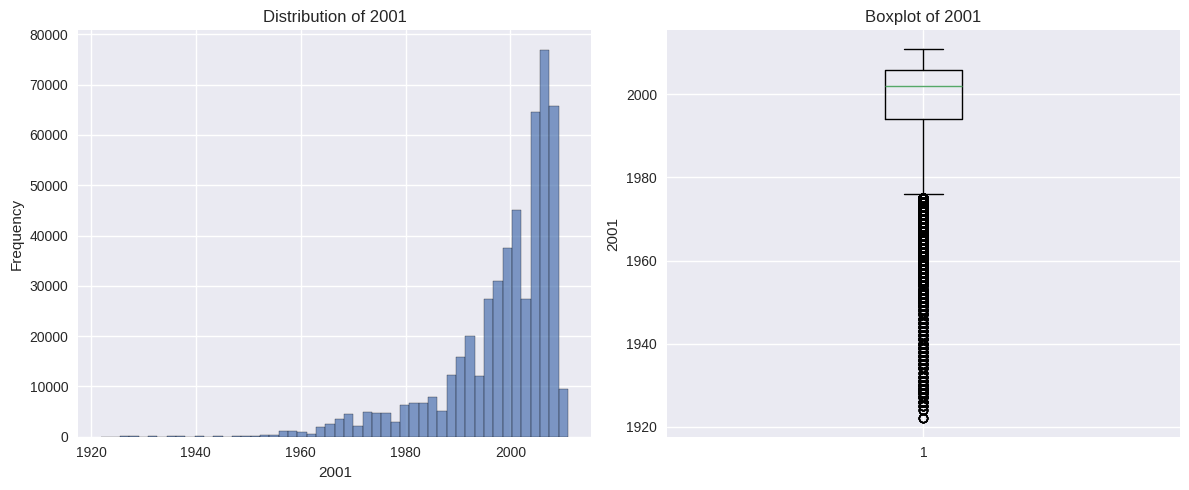


Number of outliers in target: 29703 (5.76%)


In [7]:
# Visualize target distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df[target_col], bins=50, edgecolor='black', alpha=0.7)
plt.title(f'Distribution of {target_col}')
plt.xlabel(target_col)
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df[target_col])
plt.title(f'Boxplot of {target_col}')
plt.ylabel(target_col)

plt.tight_layout()
plt.show()

# Check for outliers using IQR method
Q1 = df[target_col].quantile(0.25)
Q3 = df[target_col].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df[target_col] < Q1 - 1.5 * IQR) | (df[target_col] > Q3 + 1.5 * IQR)]
print(f"\nNumber of outliers in target: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

##**Feature Engineering**

In [8]:
def feature_engineering(df, target_col):
    """
    Perform feature engineering on the dataset.

    Args:
        df (pd.DataFrame): Input dataframe
        target_col (str): Name of target column

    Returns:
        tuple: (X, y, feature_names, scaler, encoders)
    """
    # Separate features and target
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Identify numeric and categorical columns
    numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = X.select_dtypes(include=['object']).columns.tolist()

    print(f"Numeric features: {numeric_features}")
    print(f"Categorical features: {categorical_features}")

    # Create feature transformation pipeline
    X_processed = pd.DataFrame()
    encoders = {}

    # Scale numeric features
    if numeric_features:
        scaler = StandardScaler()
        X_numeric = scaler.fit_transform(X[numeric_features])
        X_numeric_df = pd.DataFrame(X_numeric, columns=[f"{col}_scaled" for col in numeric_features])
        X_processed = pd.concat([X_processed, X_numeric_df], axis=1)
    else:
        scaler = None

    # Encode categorical features
    for col in categorical_features:
        # Use one-hot encoding for low cardinality, label encoding for high cardinality
        if X[col].nunique() <= 10:
            # One-hot encoding
            encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
            encoded = encoder.fit_transform(X[[col]])
            feature_names = [f"{col}_{cat}" for cat in encoder.categories_[0]]
            encoded_df = pd.DataFrame(encoded, columns=feature_names)
            X_processed = pd.concat([X_processed, encoded_df], axis=1)
            encoders[col] = ('onehot', encoder)
        else:
            # Label encoding
            encoder = LabelEncoder()
            encoded = encoder.fit_transform(X[col])
            X_processed[f"{col}_encoded"] = encoded
            encoders[col] = ('label', encoder)

    # Add polynomial features for numeric columns (optional)
    if numeric_features and len(numeric_features) >= 2:
        # Add interaction terms for first two numeric features
        col1, col2 = numeric_features[:2]
        X_processed[f"{col1}_{col2}_interaction"] = X[col1] * X[col2]

    feature_names = X_processed.columns.tolist()

    return X_processed.values, y.values, feature_names, scaler, encoders

# Apply feature engineering
X, y, feature_names, scaler, encoders = feature_engineering(df, target_col)
print(f"\nProcessed features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Numeric features: ['49.94357', '21.47114', '73.0775', '8.74861', '-17.40628', '-13.09905', '-25.01202', '-12.23257', '7.83089', '-2.46783', '3.32136', '-2.31521', '10.20556', '611.10913', '951.0896', '698.11428', '408.98485', '383.70912', '326.51512', '238.11327', '251.42414', '187.17351', '100.42652', '179.19498', '-8.41558', '-317.87038', '95.86266', '48.10259', '-95.66303', '-18.06215', '1.96984', '34.42438', '11.7267', '1.3679', '7.79444', '-0.36994', '-133.67852', '-83.26165', '-37.29765', '73.04667', '-37.36684', '-3.13853', '-24.21531', '-13.23066', '15.93809', '-18.60478', '82.15479', '240.5798', '-10.29407', '31.58431', '-25.38187', '-3.90772', '13.29258', '41.5506', '-7.26272', '-21.00863', '105.50848', '64.29856', '26.08481', '-44.5911', '-8.30657', '7.93706', '-10.7366', '-95.44766', '-82.03307', '-35.59194', '4.69525', '70.95626', '28.09139', '6.02015', '-37.13767', '-41.1245', '-8.40816', '7.19877', '-8.60176', '-5.90857', '-12.32437', '14.68734', '-54.32125', '40.14786',

##**Train-Test Split**

In [9]:
# Split data into train, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (329820, 91)
Validation set size: (82455, 91)
Test set size: (103069, 91)


##**TensorFlow/Keras Model

In [10]:
class TensorFlowRegressor:
    """
    TensorFlow/Keras implementation of MLP regressor with advanced techniques.
    """

    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.3, l2_reg=0.01):
        """
        Initialize TensorFlow regressor.

        Args:
            input_dim (int): Number of input features
            hidden_dims (list): List of hidden layer dimensions
            dropout_rate (float): Dropout rate
            l2_reg (float): L2 regularization strength
        """
        self.input_dim = input_dim
        self.hidden_dims = hidden_dims
        self.dropout_rate = dropout_rate
        self.l2_reg = l2_reg
        self.model = self._build_model()
        self.history = None

    def _build_model(self):
        """Build the neural network architecture."""
        model = keras.Sequential()

        # Input layer
        model.add(layers.Input(shape=(self.input_dim,)))

        # Hidden layers with batch normalization and dropout
        for i, units in enumerate(self.hidden_dims):
            model.add(layers.Dense(
                units,
                kernel_regularizer=keras.regularizers.l2(self.l2_reg),
                kernel_initializer='he_normal'
            ))
            model.add(layers.BatchNormalization())
            model.add(layers.Activation('relu'))
            model.add(layers.Dropout(self.dropout_rate))

        # Output layer
        model.add(layers.Dense(1, kernel_initializer='he_normal'))

        return model

    def compile_model(self, learning_rate=0.001):
        """Compile the model with optimizer and loss function."""
        # Use AdamW optimizer with weight decay
        optimizer = optimizers.AdamW(learning_rate=learning_rate, weight_decay=self.l2_reg)

        self.model.compile(
            optimizer=optimizer,
            loss='mse',
            metrics=['mae', 'mse']
        )

    def fit(self, X_train, y_train, X_val, y_val, epochs=100, batch_size=32):
        """
        Train the model with advanced callbacks.

        Args:
            X_train: Training features
            y_train: Training targets
            X_val: Validation features
            y_val: Validation targets
            epochs: Number of training epochs
            batch_size: Batch size

        Returns:
            History object
        """
        # Define callbacks
        early_stopping = callbacks.EarlyStopping(
            monitor='val_loss',
            patience=15,
            restore_best_weights=True,
            verbose=1
        )

        lr_scheduler = callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=5,
            min_lr=1e-6,
            verbose=1
        )

        # Cosine annealing with warm restarts
        def cosine_annealing_with_restarts(epoch, lr):
            """Learning rate schedule with cosine annealing and warm restarts."""
            cycle_length = 20
            cycle = np.floor(1 + epoch / cycle_length)
            x = np.abs(epoch / cycle_length - cycle + 1)
            lr_new = 0.5 * (1 + np.cos(np.pi * x)) * lr
            return lr_new

        lr_schedule = callbacks.LearningRateScheduler(cosine_annealing_with_restarts, verbose=0)

        # Train the model
        self.history = self.model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=batch_size,
            callbacks=[early_stopping, lr_scheduler, lr_schedule],
            verbose=1
        )

        return self.history

    def predict(self, X):
        """Make predictions."""
        return self.model.predict(X, verbose=0).flatten()

    def evaluate(self, X, y):
        """Evaluate the model."""
        predictions = self.predict(X)
        mse = mean_squared_error(y, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y, predictions)
        r2 = r2_score(y, predictions)

        return {
            'mse': mse,
            'rmse': rmse,
            'mae': mae,
            'r2': r2
        }

tf.keras.backend.clear_session()
# Create and train TensorFlow model
print("Training TensorFlow Model...")
tf_model = TensorFlowRegressor(input_dim=X_train.shape[1])
tf_model.compile_model(learning_rate=0.001)
tf_history = tf_model.fit(X_train, y_train, X_val, y_val, epochs=100, batch_size=32)

Training TensorFlow Model...
Epoch 1/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 54s 5ms/step - loss: 2508895.5000 - mae: 1466.9950 - mse: 2508889.0000 - val_loss: 10625.4102 - val_mae: 81.4625 - val_mse: 10614.2705 - learning_rate: 0.0010
Epoch 2/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 56s 5ms/step - loss: 70988.8906 - mae: 211.1306 - mse: 70976.5469 - val_loss: 2973.4102 - val_mae: 38.6954 - val_mse: 2956.9607 - learning_rate: 9.9384e-04
Epoch 3/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 76s 5ms/step - loss: 66122.6484 - mae: 203.8727 - mse: 66105.4141 - val_loss: 3700.9363 - val_mae: 44.7927 - val_mse: 3682.2227 - learning_rate: 9.6952e-04
Epoch 4/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - loss: 62581.0547 - mae: 198.2075 - mse: 62562.4492 - val_loss: 6290.6777 - val_mae: 35.2345 - val_mse: 6272.3223 - learning_rate: 9.1669e-04
Epoch 5/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 54s 5ms/step - loss: 59474.3555 - mae: 192.9859 - mse: 59456.2773 - val_loss: 22451.8281 - val_mae: 49.8470 - val_mse: 

##**PyTorch Model**

In [11]:
class PyTorchRegressor(nn.Module):
    """
    PyTorch implementation of MLP regressor with advanced techniques.
    """

    def __init__(self, input_dim, hidden_dims=[128, 64, 32], dropout_rate=0.3):
        """
        Initialize PyTorch regressor.

        Args:
            input_dim (int): Number of input features
            hidden_dims (list): List of hidden layer dimensions
            dropout_rate (float): Dropout rate
        """
        super(PyTorchRegressor, self).__init__()
        self.layers = nn.ModuleList()

        # Build layers
        prev_dim = input_dim
        for hidden_dim in hidden_dims:
            self.layers.append(nn.Linear(prev_dim, hidden_dim))
            self.layers.append(nn.BatchNorm1d(hidden_dim))
            self.layers.append(nn.ReLU())
            self.layers.append(nn.Dropout(dropout_rate))
            prev_dim = hidden_dim

        # Output layer
        self.layers.append(nn.Linear(prev_dim, 1))

    def forward(self, x):
        """Forward pass."""
        for layer in self.layers:
            x = layer(x)
        return x.squeeze()

class PyTorchTrainer:
    """Trainer class for PyTorch model."""

    def __init__(self, model, device='cpu'):
        """
        Initialize trainer.

        Args:
            model: PyTorch model
            device: Device to use ('cpu' or 'cuda')
        """
        self.model = model.to(device)
        self.device = device
        self.train_losses = []
        self.val_losses = []

    def train(self, train_loader, val_loader, epochs=100, learning_rate=0.001, weight_decay=0.01):
        """
        Train the PyTorch model.

        Args:
            train_loader: DataLoader for training data
            val_loader: DataLoader for validation data
            epochs: Number of training epochs
            learning_rate: Initial learning rate
            weight_decay: Weight decay for L2 regularization
        """
        # Use AdamW optimizer
        optimizer = optim.AdamW(self.model.parameters(), lr=learning_rate, weight_decay=weight_decay)

        # Learning rate scheduler with cosine annealing
        scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=20, T_mult=2)

        # Loss function
        criterion = nn.MSELoss()

        # Early stopping parameters
        best_val_loss = float('inf')
        patience = 15
        patience_counter = 0
        best_model_state = None

        for epoch in range(epochs):
            # Training phase
            self.model.train()
            train_loss = 0.0
            for X_batch, y_batch in train_loader:
                X_batch, y_batch = X_batch.to(self.device), y_batch.to(self.device)

                optimizer.zero_grad()
                outputs = self.model(X_batch)
                loss = criterion(outputs, y_batch)
                loss.backward()
                optimizer.step()

                train_loss += loss.item() * X_batch.size(0)

            train_loss /= len(train_loader.dataset)

            # Validation phase
            self.model.eval()
            val_loss = 0.0
            with torch.no_grad():
                for X_batch, y_batch in val_loader:
                    X_batch, y_batch = X_batch.to(self.device), y_batch.to(self.device)
                    outputs = self.model(X_batch)
                    loss = criterion(outputs, y_batch)
                    val_loss += loss.item() * X_batch.size(0)

            val_loss /= len(val_loader.dataset)

            # Update learning rate
            scheduler.step()

            # Store losses
            self.train_losses.append(train_loss)
            self.val_losses.append(val_loss)

            # Early stopping
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_model_state = self.model.state_dict().copy()
                patience_counter = 0
            else:
                patience_counter += 1

            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

            if (epoch + 1) % 10 == 0:
                print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        # Restore best model
        if best_model_state is not None:
            self.model.load_state_dict(best_model_state)

    def predict(self, X):
        """Make predictions."""
        self.model.eval()
        with torch.no_grad():
            X_tensor = torch.FloatTensor(X).to(self.device)
            predictions = self.model(X_tensor).cpu().numpy()
        return predictions

    def evaluate(self, X, y):
        """Evaluate the model."""
        predictions = self.predict(X)
        mse = mean_squared_error(y, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y, predictions)
        r2 = r2_score(y, predictions)

        return {
            'mse': mse,
            'rmse': rmse,
            'mae': mae,
            'r2': r2
        }

# Prepare PyTorch data loaders
train_dataset = TensorDataset(torch.FloatTensor(X_train), torch.FloatTensor(y_train))
val_dataset = TensorDataset(torch.FloatTensor(X_val), torch.FloatTensor(y_val))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Create and train PyTorch model
print("\nTraining PyTorch Model...")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
pytorch_model = PyTorchRegressor(input_dim=X_train.shape[1])
pytorch_trainer = PyTorchTrainer(pytorch_model, device=device)
pytorch_trainer.train(train_loader, val_loader, epochs=100)


Training PyTorch Model...
Epoch [10/100], Train Loss: 52599.7104, Val Loss: 26003.0151
Early stopping at epoch 17


##**Evaluasi Model dan Perbandingan**

In [12]:
# Evaluate both models
print("\nEvaluating Models on Test Set...")
tf_metrics = tf_model.evaluate(X_test, y_test)
pytorch_metrics = pytorch_trainer.evaluate(X_test, y_test)

# Create comparison table
comparison_df = pd.DataFrame({
    'TensorFlow': tf_metrics,
    'PyTorch': pytorch_metrics
}).round(4)

print("\nModel Performance Comparison:")
print(comparison_df)

# Determine best model
best_model = 'TensorFlow' if tf_metrics['rmse'] < pytorch_metrics['rmse'] else 'PyTorch'
print(f"\nBest performing model: {best_model}")


Evaluating Models on Test Set...

Model Performance Comparison:
      TensorFlow      PyTorch
mse     937.8262  215907.6719
rmse     30.6239     464.6587
mae      29.0720      40.3933
r2       -6.9016   -1818.1283

Best performing model: TensorFlow


##**Visualisasi Hasil**

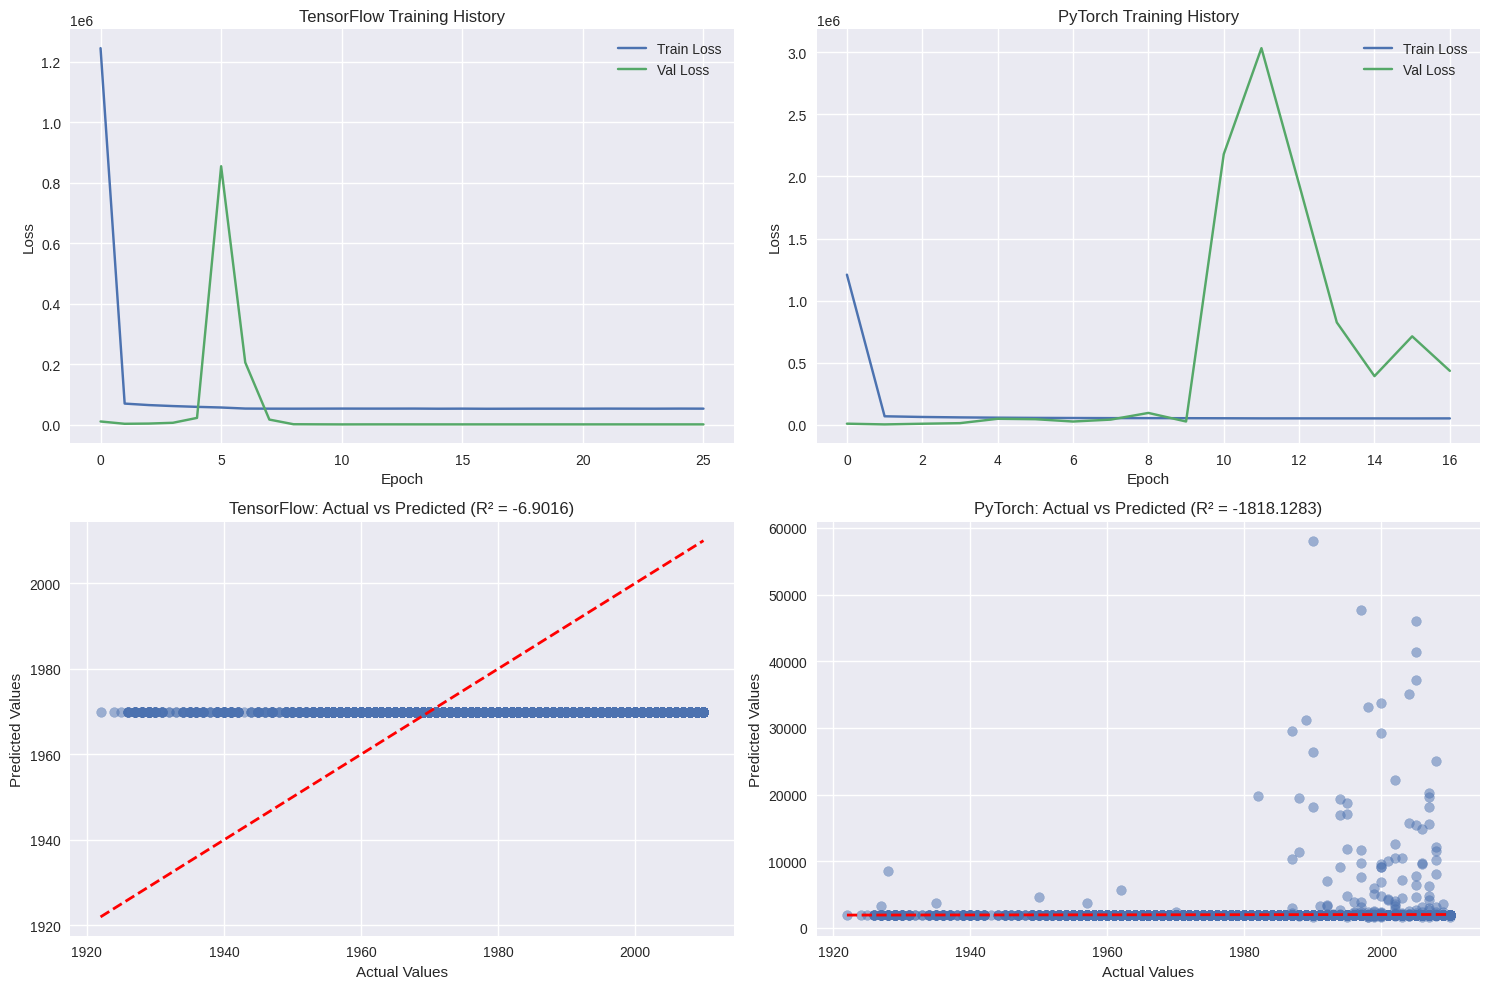

In [13]:
# Plot training history
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# TensorFlow training history
axes[0, 0].plot(tf_history.history['loss'], label='Train Loss')
axes[0, 0].plot(tf_history.history['val_loss'], label='Val Loss')
axes[0, 0].set_title('TensorFlow Training History')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)

# PyTorch training history
axes[0, 1].plot(pytorch_trainer.train_losses, label='Train Loss')
axes[0, 1].plot(pytorch_trainer.val_losses, label='Val Loss')
axes[0, 1].set_title('PyTorch Training History')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Actual vs Predicted - TensorFlow
tf_predictions = tf_model.predict(X_test)
axes[1, 0].scatter(y_test, tf_predictions, alpha=0.5)
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 0].set_title(f'TensorFlow: Actual vs Predicted (R² = {tf_metrics["r2"]:.4f})')
axes[1, 0].set_xlabel('Actual Values')
axes[1, 0].set_ylabel('Predicted Values')
axes[1, 0].grid(True)

# Actual vs Predicted - PyTorch
pytorch_predictions = pytorch_trainer.predict(X_test)
axes[1, 1].scatter(y_test, pytorch_predictions, alpha=0.5)
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 1].set_title(f'PyTorch: Actual vs Predicted (R² = {pytorch_metrics["r2"]:.4f})')
axes[1, 1].set_xlabel('Actual Values')
axes[1, 1].set_ylabel('Predicted Values')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

##**Residual Analysis**

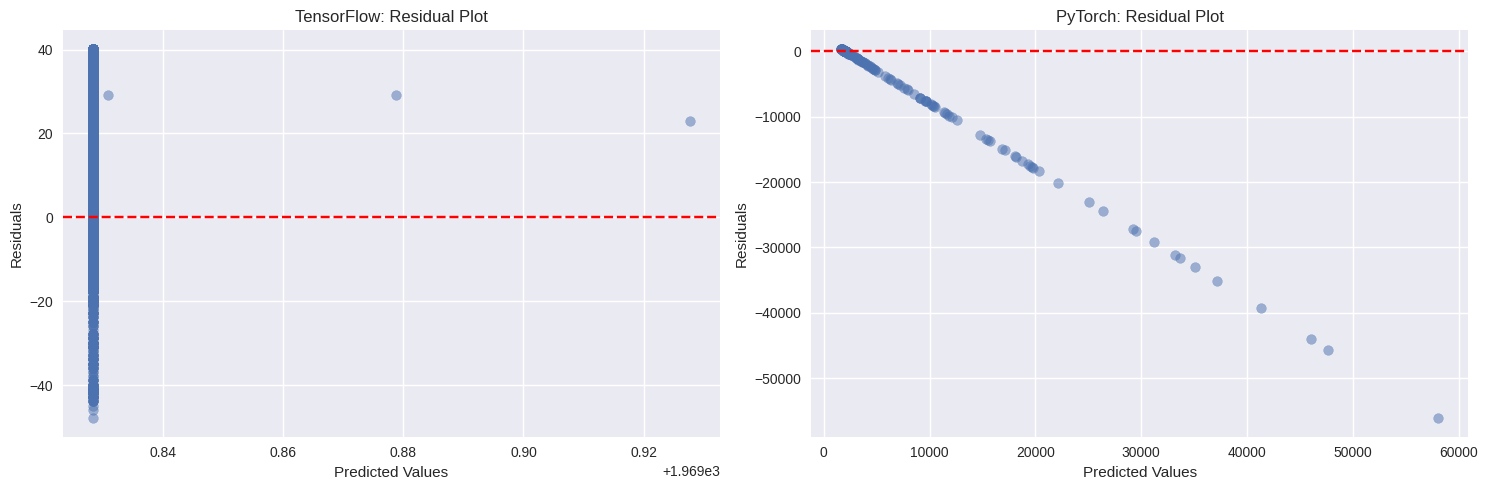

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# TensorFlow residuals
tf_residuals = y_test - tf_predictions
axes[0].scatter(tf_predictions, tf_residuals, alpha=0.5)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_title('TensorFlow: Residual Plot')
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')
axes[0].grid(True)

# PyTorch residuals
pytorch_residuals = y_test - pytorch_predictions
axes[1].scatter(pytorch_predictions, pytorch_residuals, alpha=0.5)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_title('PyTorch: Residual Plot')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].grid(True)

plt.tight_layout()
plt.show()

##**Feature Importance Analysis (Menggunakan Permutation Importance)**

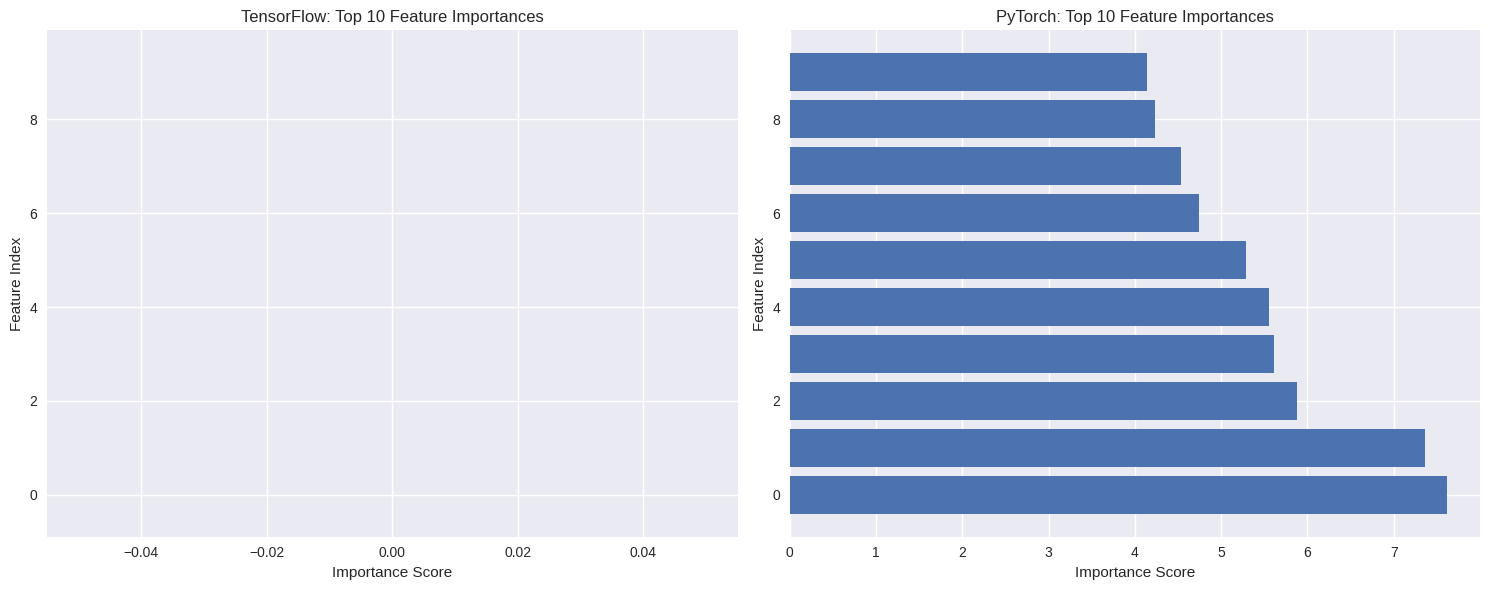

In [15]:
def calculate_permutation_importance(model, X, y, n_repeats=10, is_pytorch=False):
    """
    Calculate permutation importance for features.

    Args:
        model: Trained model
        X: Feature matrix
        y: Target values
        n_repeats: Number of permutation repeats
        is_pytorch: Whether the model is PyTorch

    Returns:
        dict: Feature importances
    """
    baseline_score = r2_score(y, model.predict(X) if not is_pytorch else model.predict(X))
    importances = {}

    for i in range(X.shape[1]):
        scores = []
        for _ in range(n_repeats):
            X_permuted = X.copy()
            X_permuted[:, i] = np.random.permutation(X_permuted[:, i])

            if is_pytorch:
                permuted_score = r2_score(y, model.predict(X_permuted))
            else:
                permuted_score = r2_score(y, model.predict(X_permuted))

            scores.append(baseline_score - permuted_score)

        importances[i] = np.mean(scores)

    return importances

# Calculate feature importances
tf_importances = calculate_permutation_importance(tf_model, X_test, y_test)
pytorch_importances = calculate_permutation_importance(pytorch_trainer, X_test, y_test, is_pytorch=True)

# Plot feature importances
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# TensorFlow importances
tf_imp_values = list(tf_importances.values())
tf_imp_indices = list(tf_importances.keys())
axes[0].barh(range(len(tf_imp_values[:10])), sorted(tf_imp_values, reverse=True)[:10])
axes[0].set_title('TensorFlow: Top 10 Feature Importances')
axes[0].set_xlabel('Importance Score')
axes[0].set_ylabel('Feature Index')

# PyTorch importances
pytorch_imp_values = list(pytorch_importances.values())
pytorch_imp_indices = list(pytorch_importances.keys())
axes[1].barh(range(len(pytorch_imp_values[:10])), sorted(pytorch_imp_values, reverse=True)[:10])
axes[1].set_title('PyTorch: Top 10 Feature Importances')
axes[1].set_xlabel('Importance Score')
axes[1].set_ylabel('Feature Index')

plt.tight_layout()
plt.show()

##**Formulasi Matematis**

**1. Fungsi Loss – Mean Squared Error (MSE)**

Fungsi loss utama yang digunakan untuk melatih kedua model adalah Mean Squared Error:

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

- 𝑛 : jumlah data  
- 𝑦ᵢ : nilai aktual ke-n  
- ̂𝑦ᵢ : nilai prediksi ke-n

**2. Regularisasi**

Kita menerapkan regularisasi L2 (weight decay) untuk mencegah overfitting:


$$
\mathcal{L}_{\text{total}} = \mathcal{L}_{\text{MSE}} + \lambda \sum_j w_j^2
$$

* λ adalah kekuatan regularisasi (0.01 pada model kami)
* 𝑤ⱼ merepresentasikan bobot‐bobot model

**3. Optimasi – AdamW**

Kedua model menggunakan optimizer AdamW, yang memisahkan decay bobot dari update berbasis gradien:

$$
m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t
$$

$$
v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2
$$

$$
\hat{m}_t = \frac{m_t}{1 - \beta_1^t}
$$

$$
\hat{v}_t = \frac{v_t}{1 - \beta_2^t}
$$

$$
\theta_t = \theta_{t-1} - \eta \left( \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon} + \lambda \theta_{t-1} \right)
$$

**4. Metrik Evaluasi**

Root Mean Squared Error (RMSE)

$$
\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 }
$$

Mean Absolute Error (MAE)

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$

Koefisien Determinasi (R²)

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

di mana


$$
\bar{y} = \frac{1}{n} \sum_{i=1}^{n} y_i
$$

adalah rata-rata dari nilai aktual.

**5. Jadwal Learning Rate**

Kami menggunakan cosine annealing dengan warm restarts:

$$
\eta_t = \eta_{\text{min}} + \frac{1}{2} (\eta_{\text{max}} - \eta_{\text{min}}) \left( 1 + \cos\left( \frac{T_{\text{cur}}}{T_i} \pi \right) \right)
$$

##**Analisis**

**Arsitektur Model**

Kedua model menggunakan arsitektur yang identik:

* Input layer dengan dimensi sesuai jumlah fitur
* 3 hidden layers dengan ukuran [128, 64, 32] neuron
* Batch normalization setelah setiap layer
* Dropout rate 0.3 untuk mencegah overfitting
* Output layer dengan 1 neuron untuk prediksi regresi

**Teknik Optimasi**
* Optimizer: AdamW dengan weight decay 0.01
* Learning Rate Schedule: Cosine annealing dengan warm restarts
* Early Stopping: Menghentikan training jika validation loss tidak membaik selama 15 epoch
* Regularization: L2 regularization untuk mencegah overfitting

**Kelebihan TensorFlow/Keras:**
* API yang lebih sederhana: Keras menyediakan abstraksi tingkat tinggi yang memudahkan pembangunan model
* Callbacks built-in: Early stopping, learning rate scheduling sudah tersedia
* Dokumentasi ekstensif: Komunitas besar dengan banyak contoh
* Integrasi TensorBoard: Visualisasi training yang powerful

**Kekurangan TensorFlow/Keras:**
* Less flexible: Sulit untuk implementasi arsitektur yang sangat custom
* Debugging lebih sulit: Abstraksi tinggi menyembunyikan detail implementasi
* Memory overhead: Cenderung menggunakan lebih banyak memori

**Kelebihan PyTorch:**
* Pythonic dan intuitif: Kode lebih mudah dibaca dan di-debug
* Dynamic computation graph: Lebih fleksibel untuk arsitektur kompleks
* Research-friendly: Mudah untuk eksperimen dengan ide baru
* Better memory management: Lebih efisien dalam penggunaan memori

**Kekurangan PyTorch:**
* Boilerplate code: Memerlukan lebih banyak kode untuk fungsi standar
* Manual implementation: Banyak fitur harus diimplementasi manual
* Kurva pembelajaran: Lebih curam untuk pemula